In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("g.csv")
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
df=df.drop(['Channel','Region'],axis=1)

In [4]:
from sklearn.cluster import KMeans 
km=KMeans(n_clusters=5,init='k-means++')
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
label=km.labels_
label0=label[label==0]
label1=label[label==1]
label2=label[label==2]
label3=label[label==3]
label4=label[label==5]
print("No. of sample in label 0 :" +str(len(label0)))
print("No. of sample in label 1 :" +str(len(label1)))
print("No. of sample in label 2 :" +str(len(label2)))
print("No. of sample in label 3 :" +str(len(label3)))
print("No. of sample in label 4 :" +str(len(label4)))

No. of sample in label 0 :106
No. of sample in label 1 :81
No. of sample in label 2 :233
No. of sample in label 3 :13
No. of sample in label 4 :0


In [6]:
center=km.cluster_centers_
center=np.array(center)
center=np.transpose(center)
o=0
for c in df.columns:
    print("for feature "+"'"+c+"'"+" center are :" +str(center[o]))
    o=o+1

for feature 'Fresh' center are :[23710.8490566   4991.48148148  6387.80686695 56453.30769231
 20031.28571429]
for feature 'Milk' center are :[ 3882.05660377 12140.54320988  3255.56223176 10026.23076923
 38084.        ]
for feature 'Grocery' center are :[ 5169.31132075 18505.50617284  4056.56223176  8739.
 56126.14285714]
for feature 'Frozen' center are :[ 3772.44339623  1591.11111111  2588.8583691  15518.07692308
  2564.57142857]
for feature 'Detergents_Paper' center are :[ 1118.26415094  8148.24691358  1199.3304721   1258.23076923
 27644.57142857]
for feature 'Delicassen' center are :[1693.10377358 1822.40740741  999.16309013 7170.53846154 2548.14285714]


In [7]:
print("Total SSE of Cluster :"+str(km.inertia_))

Total SSE of Cluster :52928148942.57611


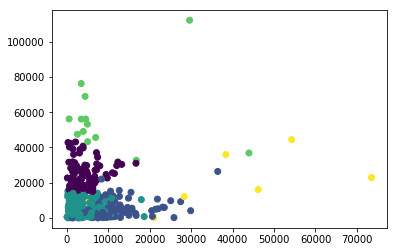

In [8]:
#interpreatation of feature Milk and Fresh
plt.scatter(df['Milk'],df['Fresh'],c=km.labels_.astype(float))
plt.show()


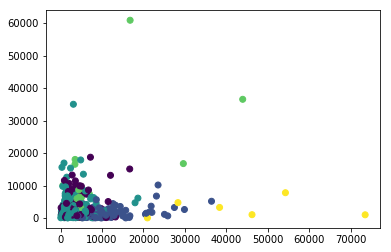

In [9]:
plt.scatter(df['Milk'],df['Frozen'],c=km.labels_.astype(float))
plt.show()

In [16]:
#homogenity for feature milk
milk=df['Milk']
cluster_r=[]
for i in range(5):
    cluster_r.append(milk[label==i])

center1=center[1]
hm=np.zeros(5)
for j in range(5):
    for i in cluster_r[j]:
        hm[j]=hm[j]+pow((i-center1[j]),2)
    print("homoginity(Inner sse) of cluster " +str(j)+" is:" +str(hm[j]))

homoginity(Inner sse) of cluster 0 is:1018332855.6603774
homoginity(Inner sse) of cluster 1 is:3316094666.098765
homoginity(Inner sse) of cluster 2 is:1859330109.3476393
homoginity(Inner sse) of cluster 3 is:1969727784.3076925
homoginity(Inner sse) of cluster 4 is:3066043020.0


In [21]:
#hetroginity of feature milk
ht=0
center_mean=np.mean(center1)
for i in center1:
    ht=ht+pow((i-center1[0]),2)
print("hetroginity of cluster mean feature :"+str(ht))


hetroginity of cluster mean feature :1276118904.4754946


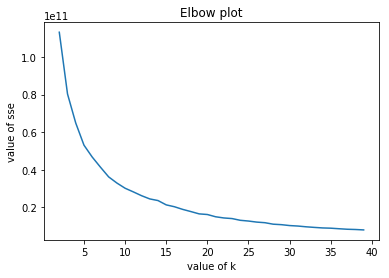

In [25]:
#elbow plot
sse_r=[]
for k in range(2,40):
    km=KMeans(n_clusters=k).fit(df)
    sse_r.append(km.inertia_)
    
plt.plot(range(2,40),sse_r)
plt.title("Elbow plot")
plt.xlabel("value of k")
plt.ylabel("value of sse")
plt.show()

